Question 1: Bias Variance Decomposition (40 points)

Recall that the squared error can be decomposed into bias, variance and noise:

We will now create a data set for which we can approximately compute this decomposition.  The function toydata.py generates a binary data set with class 1 and 2.  Both are sampled from Gaussian distributions:

You will need to implement four functions:  computeybar.py, computehbar.py, computevariance.py and biasvariancedemo.py.

          0         1  2
0 -1.391903 -1.413613  0
1  0.494230  0.193904  0
2  0.345202  0.784682  0
3 -0.050683  0.523554  0
4  0.138967 -0.959660  0


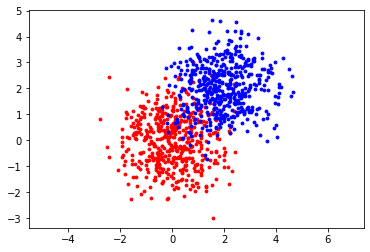

          0         1  2
0 -1.391903 -1.413613  0
1  0.494230  0.193904  0
2  0.345202  0.784682  0
3 -0.050683  0.523554  0
4  0.138967 -0.959660  0


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd  
zeroArray = []
twoArray = []
def toydata(mean1, mean2, cov, npoints):
  x, y = np.random.multivariate_normal(mean1, cov, npoints).T
  x2,y2 = np.random.multivariate_normal(mean2, cov, npoints).T
  zeroArray = []
  twoArray = []
  for i,j in zip(x,y):
    zeroArray += [[i,j,0]]
  for i,j in zip(x2,y2):
    twoArray += [[i,j,2]]  
  zeroArray = pd.DataFrame(zeroArray)
  twoArray = pd.DataFrame(twoArray)
  allPoints = [zeroArray,twoArray]
  result = pd.concat(allPoints)
  plt.scatter(x, y, c='r',s=8)
  plt.scatter(x2,y2,c='b',s=8)
  plt.axis('equal')
  plt.show()
  return result

mean = [0, 0]
mean2 = [2,2]
cov = [[1, 0], [0, 1]]  
npoints=500
toydata = toydata(mean, mean2, cov, npoints)

(a) Noise (computeybar.py):  First we focus on the noise.  For this, you need to compute   ̄y(~x) in com-puteybar.py.  With the equations, p(~x|y= 1)∼ N(0,I) andp(~x|y= 2)∼ N(μ2,I), you can compute theprobabilityp(~x|y).  

Then use Bayes rule to computep(y|~x).Note:  You may want to use the norm probability density function, which you can define by yourself oryou can directly use some package to call this function if you find some.  With the help of computeybar.pyyou can now compute the “noise” variable within biasvariancedemo.py.  

In [ ]:
from scipy.stats import norm
import numpy as np
import math
def toydata(mean1, mean2, cov, npoints):
  x, y = np.random.multivariate_normal(mean1, cov, npoints).T
  x2,y2 = np.random.multivariate_normal(mean2, cov, npoints).T
  zeroArray = []
  twoArray = []
  for i,j in zip(x,y):
    zeroArray += [[i,j,0]]
  for i,j in zip(x2,y2):
    twoArray += [[i,j,2]]
  zeroArray = pd.DataFrame(zeroArray)
  twoArray = pd.DataFrame(twoArray)
  allPoints = [zeroArray,twoArray]
  result = pd.concat(allPoints)
  return result

def normpdf(x, mu, s):
  top = (np.power((x-mu)/s,2)*-0.5)/(np.sqrt(2*np.pi)* s)
  bottom = (math.sqrt(2*math.pi) * s)
  n = top / bottom
  return n
mean = [0, 0]
mean2 = [2,2]
cov = [[1, 0], [0, 1]]  
npoints=500

xte = toydata(mean, mean2, cov, npoints)
xte2 = xte.iloc[:, 0:2]
def computebar(xTe, OFFSET):
  n, d = xTe.shape
  ybar = np.zeros(n)
  sigma = 1
  data = []
  for x,y in xTe.T.iteritems():
    mu1 = y[0]
    mu2 = y[1]
    px = normpdf(mu1, 0,sigma)
    py = normpdf(mu2, 0, sigma)
    px2 = normpdf(mu1, OFFSET, sigma)
    py2 = normpdf(mu2, OFFSET, sigma)
    prob0 = px * py
    prob2 = px2 * py2
    p = prob2 > prob0
    p += 1
    bp = 0.5
    x1 = (prob0 * bp)/ (prob0 * bp + prob2 * bp)
    x2 = (prob2 * bp) / (prob0 * bp + prob2 * bp)
    ybar = x1 + (2*x2)
    # data += [p]
    data +=[ybar]
  return data
# ybarVector =  
data = computebar(xte2, 2)
print(len(data))
# for i in data:
#   print(i)

1000
1.990410543222186
1.9999115021012386
1.9920046597855638
1.0363882840827
1.9904875479226458
1.997250034539015
1.9979618673932542
1.863623250995914
1.9230584579971697
1.0009651734635039
1.999480145251991
1.9247218295032937
1.9989261444601472
1.1166991164901663
1.9998571638070946
1.9999362767115116
1.003854476052879
1.9996959533887975
1.9979909191124419
1.9995092408720276
1.9978774745390477
1.2027126576922762
1.8991507346763423
1.9998674115705934
1.995252571244576
1.5971071725901558
1.2862015294509939
1.9999206257604665
1.9992222068146566
1.9991508508193463
1.989262633106525
1.9999990221798907
1.9983710536928385
1.996578866241494
1.9961415556145472
1.9999999624390277
1.994821090560354
1.987704579108583
1.9999957228508871
1.9917801522837086
1.9998979571346398
1.1777043648567125
1.9769852100307175
1.9652905202605417
1.9999369212478906
1.9977422656563466
1.98279273919126
1.9934252531068202
1.9999771041786643
1.0378786051695312
1.9997703669636189
1.9922978185632423
1.3234909345620325
1.9

b) Bias (computehbar.py):  For the bias, you will need ̄h.  Although we cannot compute the expectedvalue ̄h=E[h], we can approximate it by training many hD and averaging their predictions.  Edit the file computehbar.py:  average over nmodels different hD, each trained on a different data set ofninputs drawn from the same distribution.  Feel free to call toydata.py to obtain more data sets.Note:  You can use ridge regression for hD.  With the help of computehbar.py you can now compute the“bias” variable within biasvariancedemo.py.

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from numpy import absolute
def computehbar(xTe, yTe, OFFSET):
  model = Ridge(alpha=1.0)
  cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
  scores = cross_val_score(model, xTe, yTe, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
  scores = absolute(scores)
  mean = scores.mean()
  sd = scores.std()
  print('Mean MAE: %.3f (%.3f)' % (mean, sd))
  return scores
hbar = computehbar(xte2, data, 2)

Mean MAE: 0.199 (0.017)
[0.23387232 0.17514063 0.20791577 0.18138481 0.2156567  0.19306006
 0.18350379 0.1822562  0.2198072  0.19200012 0.1904923  0.19253811
 0.19669518 0.16064057 0.18475606 0.21637669 0.21299813 0.2112561
 0.21093659 0.21019388 0.20868258 0.22288109 0.18084322 0.21242797
 0.17138451 0.20392678 0.19780916 0.20988175 0.18489089 0.19309094]


(c)  Variance  (computevariance.py):  Finally,  to  compute  the  variance,  we  need  to  compute  the  termE[(hD− ̄h)2].  Once again, we can approximate this term by averaging overnmodelsmodels.  Edit the filecomputevariance.py.With  the  help  of  computevariance.py  you  can  now  compute  the  “variance”  variable  within  biasvari-ancedemo.py.

In [ ]:
from sklearn.kernel_ridge import KernelRidge
from sklearn.model_selection import train_test_split
def computeVariance(xTe, alpha, hbar):
  n = xTe.shape[0]
  vbar = np.zeros(n)
  clf = KernelRidge(alpha=alpha)
  trainX, testX, trainY, testY = train_test_split(xTe, hbar)
  clf.fit(trainX, trainY)
  var = clf.score(testX, testY)
  return var
  
var = computeVariance(xte2, 1, data)

Demo (biasvariancedemo.py):  In this function, you need to implement a plotting function that howthe error decomposes (roughly) into bias, variance and noise when regularization constant λ increases.  You can see the trend if you did everything correctly.Note:  You can set a training dataset with a size of 500, for a really big dataset you can set the size as 100000.  You can try average over 25 models.  But all these parameters you can change freely.The bigger number for the number of models and/or the training dataset, the better your approximation will be forE[h] andE[(hD− ̄h)2]).If you get everything correct, you should get some plot like this:

In [ ]:
# run next code block as colab's version of mlxtend is not up to date

In [ ]:
!pip install mlxtend --upgrade

     |████████████████████████████████| 1.3MB 5.2MB/s 
  Found existing installation: mlxtend 0.14.0
    Uninstalling mlxtend-0.14.0:
      Successfully uninstalled mlxtend-0.14.0


In [19]:
# I am almost certain I did not complete the above functions correctly. I was very confused on how 
# to impliment each of the functions but I do grasp the bais variance noise trade off. With no starter files, even though
# the assignment references them, I couldn't understand you are looking for. Below I use my own methods
# to derive bias, variance, and noise from the data and plot them accordingly.
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from mlxtend.evaluate import bias_variance_decomp
import pandas as pd  
import numpy as np

#Bring in data
def toydata(mean1, mean2, cov, npoints):
  x, y = np.random.multivariate_normal(mean1, cov, npoints).T
  x2,y2 = np.random.multivariate_normal(mean2, cov, npoints).T
  zeroArray = []
  twoArray = []
  for i,j in zip(x,y):
    zeroArray += [[i,j,0]]
  for i,j in zip(x2,y2):
    twoArray += [[i,j,2]]  
  complete = zeroArray + twoArray
  complete = pd.DataFrame(complete)
  return complete

mean = [0, 0]
mean2 = [2,2]
cov = [[1, 0], [0, 1]]  
npoints=500
toydata = toydata(mean, mean2, cov, npoints)

# get P(Y|x)
clf = DecisionTreeClassifier()
X = toydata.iloc[:, 0:2]
Y = toydata.iloc[:, 2:]
#change to arrays
X = np.array(X)
Y = np.array(Y)
xtrain, xtest, ytrain, ytest = train_test_split(X,Y,test_size=0.33, random_state=1)
noise, bias, var = bias_variance_decomp(clf, xtrain, ytrain, xtest, ytest, loss='mse', num_rounds = 1000, random_seed=3)
print(noise, bias, var)
# def biasvariancedemo():


1.997338328741965 579.8961604848485 0.24007723636363634


Question 2: SVM (30 points)

Here is an visualization of a set of 3600 points in 2D space (hw3data2.txt).

Which classifier would be able to achieve better performance on this distribution?  Justify your choice.

Implement your chosen classifier and report your accuracy.

Produce a plot that shows your final classifier as a dotted line, along with the original data points.You can make the plot either in the original space or feature space.

In [ ]:
from sklearn import svm
import pandas as pd
from sklearn.model_selection import train_test_split
#Which classifier would be able to achieve better performance on this distribution? Justify your choice.
# bring in data
data = []
cls = []
xcoord = []
ycoord = []
count = 0
clsNums = []
with open('hw3_data2.txt', "r") as filestream:
  for line in filestream: 
    count += 1
    currentline = line.split(",")
    cls.append(currentline[0])
    if currentline[0] == '+':
      clsNums += [1]
    else:
      clsNums += [-1]
    y = currentline[2].split('/')
    data.append([currentline[1], y[0][:16]])
dataNum = []
for i in data:
  dataNum.append([int(float(i[0])), int(float(i[1]))])
  xcoord.append(float(i[0]))
  ycoord.append(float(i[1]))
#seperate into train test split
trainData = pd.DataFrame(data)
trainLabels = pd.DataFrame(clsNums)
print(trainData.head())
X_train, X_test, y_train, y_test = train_test_split(trainData, trainLabels, test_size=0.1)

#classifier 2 - 
clf2 = svm.LinearSVC()
clf2.fit(X_train, y_train)
acc = clf2.score(X_test, y_test)
print("SVM Linear Classifier Train Accuracy: " + str(acc))
#classifier 3 - 
clf3 = svm.SVC(kernel='rbf')
clf3.fit(X_train, y_train)
acc = clf3.score(X_test, y_test)
print("SVM RBF Classifier Train Accuracy: " + str(acc))
#classifier 4 = 
clf4 = svm.SVC(kernel = 'poly')
clf4.fit(X_train, y_train)
acc = clf4.score(X_test, y_test)
print("SVM Polynomial Classifier Train Accuracy: " + str(acc))
#classifier 5 -
clf5 = svm.SVC(kernel = 'sigmoid')
clf5.fit(X_train, y_train)
acc = clf5.score(X_test, y_test)
print("SVM Sigmoid Classifier Train Accuracy: " + str(acc))

                    0                 1
0   1.607874242607826  9.24755723792936
1  3.0032578840872253  6.61025829470719
2   4.069008324104738  18.3272803261927
3  0.4071984942837261  14.8355166011076
4  13.747304642502037  8.21999072849858
SVM Linear Classifier Train Accuracy: 0.4777777777777778


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVM RBF Classifier Train Accuracy: 0.9555555555555556


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVM Polynomial Classifier Train Accuracy: 0.8055555555555556


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVM Sigmoid Classifier Train Accuracy: 0.33611111111111114


In [ ]:
#Implement your chosen classifier and report your accuracy.
clf3 = svm.SVC(kernel='rbf')
clf3.fit(X_train, y_train)
acc = clf3.score(X_test, y_test)
print("SVM RBF Classifier Train Accuracy: " + str(acc))

SVM RBF Classifier Train Accuracy: 0.9555555555555556


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


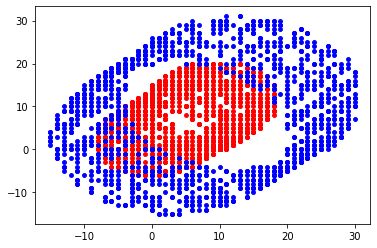

In [ ]:
from matplotlib import pyplot as plt
#Produce a plot that shows your final classifier as a dotted line, along with the original data points.You can make the plot either in the original space or feature space.
posPoints = []
negPoints = []
xPos = []
yPos = []
xNeg = []
yNeg = []
for i in range(len(dataNum)):
  if(cls[i] == '+'):
    posPoints.append(dataNum[i])
  elif(cls[i] == '-'):
    negPoints.append(dataNum[i])
for i in posPoints:
  xPos.append(i[:1])
  yPos.append(i[1:])
for i in negPoints:
  xNeg.append(i[:1])
  yNeg.append(i[1:])

plt.scatter(xPos,yPos, c='red', s=15)
plt.scatter(xNeg,yNeg, c='blue', s=15)

Question 3: ROC Curves (30 points)

We want to generate a classifier that is able to distinguish between malign and benign tumors in mam-mography.  Assume that malign as well as benign tumors appear equally often.  Tumor images can be foundin figure 1a and 1b.  Notice that the original images of the lesions have been normalized to a standard size.Assume you already have a method which segments the tumor.  The physicians give us a table (see figure 1c)with the properties that they use to distinguish benign from malign tumors.  Answer the following questions:

Give three features that would allow you to distinguish between malign and benign tumors.  Describe shortly how to calculate them given the images in figure 1a and 1b, or segmented images.  Describe shortly why you chose these features.

In [ ]:
# three features that would allow you to distinguish between malign and benign tumers
# 1. Margin
# 2. Shape
# 3. Density

# Describe shortly how to calculate them given the images in figure 1a and 1b, or segmented images.
# First, you should go through all the images and process them in a way that outputs each image as an array of feature vecotrs.
# Using the arrays of feature vectors, you could train a classifier to recognize each of these three features. For example the feature margin
# can be split into four classes: Spiculated, Indistinct, Microlobulated, and Circumscribed where a Spiculated
# tumor is most likely to be Malignant and a Circumscribed tumor is most likely to be Benign. 
# For feature margin it looks like benign tumors are more circular than malign tumors, so most likely the classifier is going to use a cirularity function
# for classification. One function I found for Circularity in images is C = (4pi * A) / P^2 where A = the sum of pixels that are in the forground and 
# P = N1 + Sqrt(2 * N2) where Ni = the number of pixels with 4 connected background pixels. 
# For feature shape it appears malign tumors have more variation in pixel intensities than benign tumors. Using a histogram, we can show the ratio of the 
# number of pixels inside a tumor, that appear to have a different gray value, to the number of pixels inside the entire shape of the tumor. Using this information
# we can calculate the entropy of each tumor to classify high entropy tumors as malign and low/0 entropy tumors as benign
# Finally, we can calculate density by finding how intense the tumor image is. That is to say, images with higher density appear to have more intense pixels, and 
# will be classified as malign. Images with lower density appear to have less intense pixels, and will be classified as benign. Using the histogram from when we classified
# shape, we can use the mean of this histogram to find the average intensity of each image. Images with larger means will be classified as malign, while images
# with smaller means will be classified as benign.
# Simply put, you will calculate each of the features by comparing the feature vecotors derived from the tumor image to those of already classified tumors
# using the functions for Circularity, Entropy, and Mean.

# I chose these three features as they were given in Figure 4: Question 3.
# Based on this figure, it appears there is a scale for each feature which may provide evidence for whether or not the tumor is Malignant or Benign
# For instance, the feature margin has four classifications: Spiculated, Indistinct, Microlobulated, and Circumscribed. From left to right these classes
# are on a scale that is more likely to be Malignant to more likely to be Benign.
# The same goes for Shape which has classes: Irragular, Lobular, Round, and Oval.  From left to right these classes
# are on a scale that is more likely to be Malignant to more likely to be Benign.
# Finally the feature Density can be measured on a range from High density which is more likely to be Malignant, to Low density which is 
# more likely to be Benign.

Given these features design a classifier.  Assume that the cost of misclassifying a malign tumor is 2 times the cost to misclassify a benign.  Explain what other assumptions you are making (if any).

In [ ]:
# As I already suggested, you can create a classifier using the three feature classifications gained from part one. 
# Assuming the cost of misclassifiying a malign tumor is 2 times the cost of misclissifying a benign tumor we will have to create our own evaluation function
# and adjust the hyperparameters of the model to optimize this evaluation function. The evaluation function will penalize misclassificatoins of malign tumors at 
# 2 times the cost of misclassifying benign.
# Another option would be to train a neural network to classify the tumors. Using this sort of classifier, you can impliment the weighted cross-entropy function
# to reflect the misclassification penalty you are looking for. 
# A third option would be to 
# Other assumptions I would make are that the data is fairly balanced between malign and benign tumors, all data is classified correctly, and the feature gained from part
# one are accurately reported. 

We want to compare our computer aided diagnoses system with the performance achieved nowadays inclinical practice by radiologists and a CAD system that is sold and available at the moment in the clinic.The system at the clinic gives us as a result a probability that a tumor is malign.  The comparisonis done using ROC curves.  Three ROC curves which are shown in figure 2 are generated.  ROC(1)corresponds to the radiologist performance, ROC(2) corresponds to the already existing system andROC(3) corresponds to the system we just design.

–How could we generate ROC(1)?  Describe the steps and the information that you need to gatherto obtain ROC(1).

–How could we generate ROC(2) and ROC(3)?  Describe the steps and the information that youneeded to gather to obtain ROC(2) and ROC(3).

–Given the ROC curves how can you compare the performance of the different systems?

–What can you say of the performance of the radiologists in comparison to the CAD systems?

–What can you say about the performance of the CAD systems in relation to each other?

In [ ]:
################################################################################################################
# –How could we generate ROC(1)? Describe the steps and the information that you need to gatherto obtain ROC(1).
################################################################################################################
# In order to create the ROC for the radiologist performance, we must have a baseline to use as testing data. For
# this instance we can assume biopsies are 100% accurate and will be used as the baseline. Next we can have a radiologist 
# evaluate images and classify them on a scale from 1 to 10, 1 = completely Malign and 10 = completely Benign. Using the 
# radiologists answers we can change the classification threshold for whether the tumor is malign or benign. Using the results 
# of each threshold, we can compare to the baseline and recieve 10 different points by calculating the sensitivity and 
# specificity between the threshold and baseline and then use the 10 points to make the ROC curve 
################################################################################################################
# –How could we generate ROC(2) and ROC(3)? Describe the steps and the information that you needed to gather to obtain ROC(2) and ROC(3).
################################################################################################################
# For ROC curve 2 we will use the same baseline of biopsy results as we did in ROC curve 1. Next we will the CAD program
# classify tumors which will give us results in the form of probabilities the tumor is malign. We can then create thresholds for 
# what probabilities determine whether or not an image is malign or benign tumor. Using these thresholds, we can calculate the
# sensitivity and specificity between the thresholds and baseline, and then approximate the ROC curve accordingly.

# For ROC curve 3 we will use the same baseline of biopsy results as we did in ROC curves 1 and 2. Next we will evaluate the system
# we designed by first training it additional training data. If there is no extra labeled training data, we can use test_train_split
# or cross validation on the testing data to train our model. Once our model is trained, we can evaluate it on the remaining testing
# data/complete testing data. Unlike ROC curve 2, we will not be looking at a probability if the tumor is malign, but instead will
# be looking at our cost function. Since Malign tumors are penalized at 2:1 rate, we will use the cost function to create the thresholds
# we will use to build our ROC curve. Using the thresholds we can calculate the sensitivity and specificity between the 
# thresholds and baseline, and then approximate the ROC curve accordingly.
################################################################################################################
# Given the ROC curves how can you compare the performance of the different systems?
################################################################################################################
# Once you know the ROC curves, you can plot them on a graph. If by looking at the curves it is not obvious which
# curve is the best performer, you can calculate the area under each curve. The Curve with the greatest area will
# be deemed the best performer in classifying malign/benign tumors. 
################################################################################################################
# What can you say of the performance of the radiologists in comparison to the CAD systems?
################################################################################################################
# The radiologist is better at classifying tumors than the CAD system. Looking at the True Positive Fraction on 
# the Y axis, it appears the new system, we designed, has mroe sensitivity if look at specificity above 90%.
################################################################################################################
# What can you say about the performance of the CAD systems in relation to each other?
################################################################################################################
# It is hard to distinguish generally which of the CAD systems is better at classifying tumors. By glancing at 
# them on the ROC chart, it appears they both have similar areas under their curves. However, if we distinguish a 
# lower and upper boundry of the True Positive Fraction on the Y axis, we can compare the two curve meaningfully.
# For instance, if the lower boundry is 0% and upper boundry of specificity is 85%, it would appear our model, ROC3
# performs better. However if we set the lower boundry at 85%, ROC2 surpasses ROC3 and has better performance. 

Imagine that you find out looking at the feature space that each class seems to cluster in more than one location in the feature space. 

Would that have influence in your choice of the classifier?  Why?

If you would choose another classifier which one?  

Which assumptions are you making?  

Describe howyou would implement it?  

What are the disadvantages of this method compared to the one you already had?

In [ ]:
################################################################################################################
# Would that have influence in your choice of the classifier? Why?
################################################################################################################
# If each class seems to cluster in more than one location in the feature space, that would influence my choice
# of classifier. If classes are clustering around more than one location, that means there is more than one selection
# that can be made for each class which would not be appropriate for something as critical as tumor diagnosis
################################################################################################################
# If you would choose another classifier which one 
################################################################################################################
# If we were seeing this problem, I might use a K-Nearest Neighbors classifier. This may be optimal
# because it would allow me to adjust how many neighbors I'd use to make my classifications. If I was still recieving multiple 
# cluster locations for each class, I could increase the number of neighbors required for a classifications, which would
# enforce the best classification.
################################################################################################################
# Which assumptions are you making?
################################################################################################################
# The assumptions I am making are that the features I extracted from part one will allow for consitant classifications
# of tumors. While the clustering issue may still occur with KNN, I am assuming an increased K will minimize the multiple
# cluster locations for each class. I am also assuming we have enough data points to increase K to a point that would 
# make this classifier meaningful
################################################################################################################
# Describe howyou would implement it?
################################################################################################################
# I briefly discussed the KNN implementation already, however, it would start by first extracting the features from part
# one. After this I would train my model using seperate training data, or train_test_split/cross validation on the 
# testing data. Once I trained my model, I would evaluate it and continue tweaking hyperparameters until the multiple
# cluster locations diminished. I would adjust the number of neighbors, the distance function, and would even consider
# transposing the data into new dimensions to fix the clustering issue. 
################################################################################################################
# What are the disadvantages of this method compared to the one you already had?
################################################################################################################
# The disadvantages of this classifier is that it would not perform very well with large dataset. Calculating the 
# distance, espicially in extended dimensions, would be costly in terms of complexity. If any of the training data
# is mislabeled, this classifier could be heavily skewed as KNN is very sensitive to outliers and missing values.